## HW4, Ghazaleh Zehtab
# Q3

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plot_utils
import seaborn as sns
import statistics
from sklearn import tree, metrics, preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## Q3.a

In [24]:
df= pd.read_csv('Diabetes.csv')

df.columns=['number of times pregnant','Glucose','Diastolic Blood Pressure','Skinfold Thickness','2-Hour serum insulin','BMI','Diabetes Pedigree Function','Age','Class']
df=df.replace('MISS',np.nan)
df=df.replace('missing',np.nan)
df=df.replace('NULL',np.nan)
df=df.replace("''",np.nan)
df=df.replace("?",np.nan)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
min_max_scaler_df = pd.DataFrame(x_scaled,index=df.index, columns=df.columns)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler_df_trans = pd.DataFrame(imputer.fit_transform(min_max_scaler_df))
scaler_df_trans.columns = min_max_scaler_df.columns
scaler_df_trans.index = min_max_scaler_df.index
x = scaler_df_trans.iloc[:,:-1]
y = scaler_df_trans.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=6,
                               criterion="entropy", random_state=0).fit(x_train,y_train)

## Q3.b

In [25]:
y_pred = model.predict(x_test)
#metrics.accuracy_score(y_test, y_pred)

## Q3.c

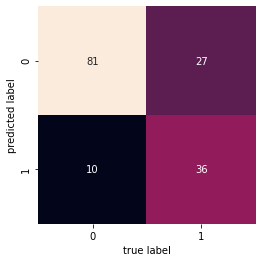

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Q3.d

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))



              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       108
         1.0       0.57      0.78      0.66        46

    accuracy                           0.76       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.79      0.76      0.77       154

